In [1]:
from fastai.vision import *

In [2]:
folder = 'a'

In [3]:
path = Path('data')
dest = path/folder

In [4]:
classes = ['a','b','c', 'd', 'e', 'f', 'g', 'h', 'i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

Then we can remove any images that can't be opened:

In [5]:
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500)

## View data

In [6]:
# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
# If data is clean run this cell instead of the one before
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='train', valid='valid', test='test',ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

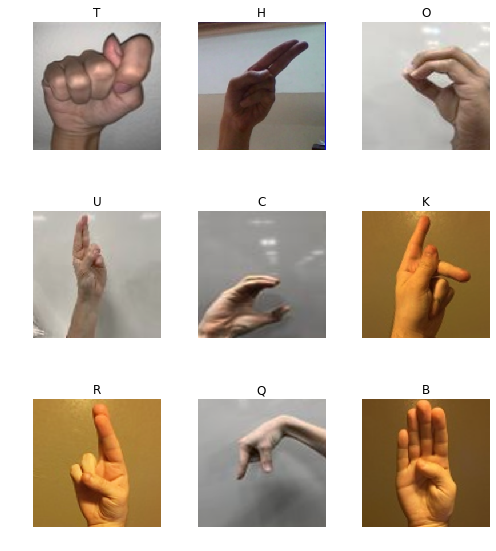

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y'],
 24,
 7689,
 932,
 1047)

## Train model

In [7]:
# can use resnet50 for more layers
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.343927,0.544598,0.175966,01:25
1,0.443125,0.264286,0.053648,01:19
2,0.171774,0.110391,0.027897,01:20


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


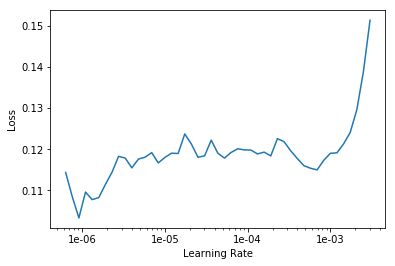

In [13]:
learn.lr_find()
learn.recorder.plot()

In [17]:
# learn.fit_one_cycle(2, max_lr=slice(1e-6,4e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.066607,0.125512,0.037554,01:18
1,0.067806,0.127481,0.038627,01:19


## Interpretation

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

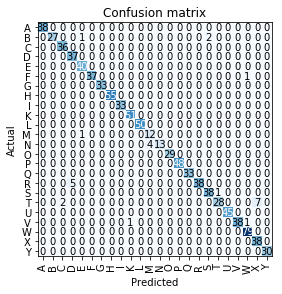

In [10]:
interp.plot_confusion_matrix()

['S', 'T', 'T', 'A', 'A', 'A', 'A', 'E', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'S', 'E', 'E', 'E', 'E', 'N', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']

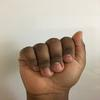

In [20]:
preds = []
for i in range(0,200):
    p = learn.predict(data.test_ds.x[i])
    preds.append(str(p[0]))
    
print(preds)
data.test_dl.dl.dataset.x[27]

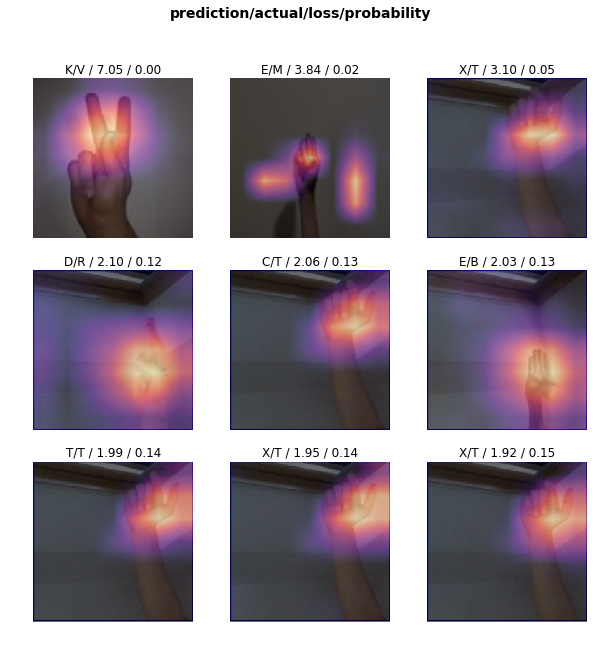

In [11]:
interp.plot_top_losses(9, figsize=(10,10))

In [22]:
preds,y = learn.get_preds(True)

In [24]:
y

tensor([ 0,  0,  0,  ..., 23, 23, 23])

In [27]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torc

Then we create a new learner to use our new databunch with all the images.

First thing first, let's export the content of our `Learner` object for production:

In [12]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [26]:
defaults.device = torch.device('cpu')
learn = load_learner(path)

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [32]:
path = Path(path/'asl_alphabet_train')
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torc

/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
/Users/applemac/anaconda3/lib/python3.7/site-packages/fastai/vision/transform.py:235: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torc

In [44]:
import os
path = Path(r"data")
path = Path(path/"asl_alphabet_train")
path = os.path.join("data", "asl_alphabet", "train", "F", "F2516.jpg")
print(path)
img = open_image(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

data\asl_alphabet\train\F\F2516.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'data\\asl_alphabet\\train\\F\\F2516.jpg'